<h1 style="text-align: center; font-size: 36px;">BUILD WEEK 3</h1>
<h1 style="text-align: center; font-size: 36px;">ANALISI DELLA PRODUZIONE GLOBALE DI CO^2 DAL 1750 AL 2020</h1>

## IMPORTAZIONE DELLE LIBRERIE 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn  as sns
import sys

## VERIFICA DELLA PRESENZA DEL FILE

In [2]:
# Controllo e lettura del file, in caso contrario arresto del sistema
try:
    file_uno_path = 'Dataset build_week_3/owid-co2-data.csv'
    df = pd.read_csv(file_uno_path)
except FileNotFoundError:
    print("File owid-co2-data.csv non trovato.")  # Nome del file corretto nel messaggio
    sys.exit()

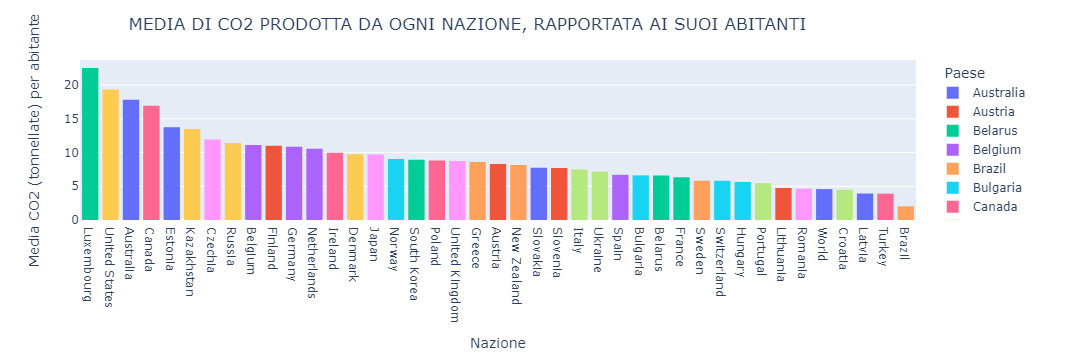

In [4]:
co2_con = df.dropna()
fig = px.histogram(co2_con, x="country", y="co2_per_capita", histfunc="avg", color="country",
                   labels={"co2_per_capita": "CO2 per Capita (media)"})  

# Aggiornamento del layout per aggiungere etichette e personalizzare la legenda
fig.update_layout(
     title={
        'text': "MEDIA DI CO2 PRODOTTA DA OGNI NAZIONE, RAPPORTATA AI SUOI ABITANTI",
        'y':0.95,  # Altezza del titolo rispetto al grafico
        'x':0.43,  # Posizione del titolo rispetto all'asse x
        'xanchor': 'center',  # Ancoraggio del titolo rispetto all'asse x
        'yanchor': 'top'  # Ancoraggio del titolo rispetto all'asse y
     },
    xaxis_title="Nazione",  # Etichetta per l'asse x
    yaxis_title="Media CO2 (tonnellate) per abitante",  # Etichetta per l'asse y
    legend_title="  Paese",  # Titolo della legenda, ma con Plotly Express il titolo si basa su `color` o altre variabili
    xaxis={"categoryorder": "total descending"}  # Ordinamento basato sull'aggregazione
)

fig.show()

## MAPPA DINAMICA DELLE EMISSIONI DI CO2 NEL MONDO

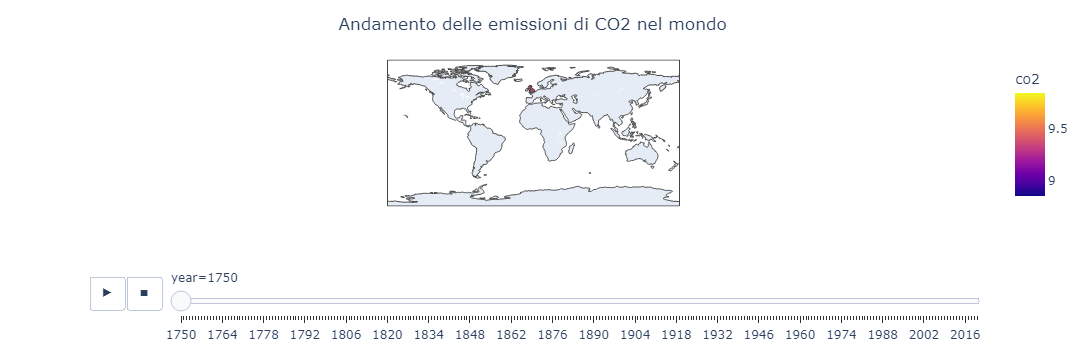

In [6]:
co2_ani = df.sort_values(by="year")
fig = px.choropleth(co2_ani, locations="country", locationmode="country names", color="co2", animation_frame="year")
fig.update_layout(
    title={
        'text': "Andamento delle emissioni di CO2 nel mondo",
        'x': 0.49,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        lonaxis=dict(range=[-180, 180]),  # Range di longitudine
        lataxis=dict(range=[-90, 90])  # Range di latitudine
    )
)
fig.show()

## CONFRONTO DELLE EMISSIONI TRA IL 1750 E IL 2020 

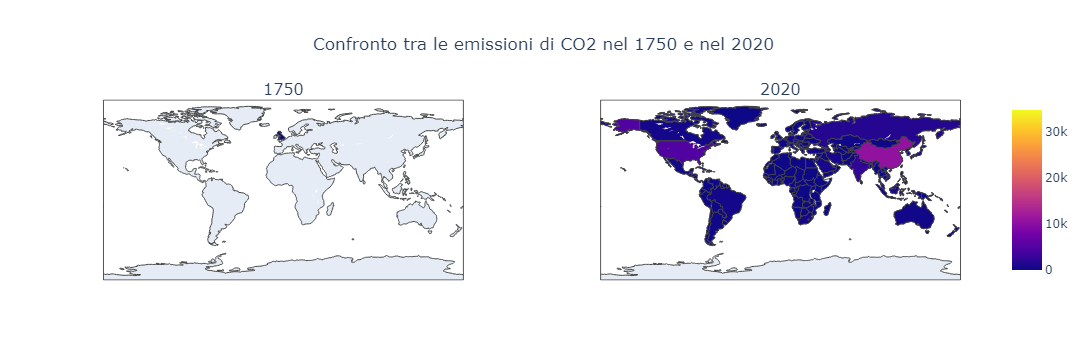

In [7]:
co2_1750 = df[df.year==1750]
fig1 = px.choropleth(co2_1750, locations="country", locationmode="country names", color="co2")
fig1.update_layout(
    title={
        'text': "Le emissioni di CO2 nel 1750",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        lonaxis=dict(range=[-180, 180]),  # Range di longitudine
        lataxis=dict(range=[-90, 90])  # Range di latitudine
    )
)

co2_2020 = df[df.year==2020]
fig2 = px.choropleth(co2_2020, locations="country", locationmode="country names", color="co2")
fig2.update_layout(
    title={
        'text': "Le emissioni di CO2 nel 2020",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        lonaxis=dict(range=[-180, 180]),  # Range di longitudine
        lataxis=dict(range=[-90, 90])  # Range di latitudine
    )
)

# Creazione della griglia di subplot e inserimento delle mappe
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("1750", "2020"), specs=[[{'type': 'geo'}, {'type': 'geo'}]])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

# Aggiornamento del layout generale
fig.update_layout(
    title="Confronto tra le emissioni di CO2 nel 1750 e nel 2020",
    title_x=0.5
)

fig.show()

## MAPPA DINAMICA DELLE EMISSIONI DI CO2 RAPPORTATE AGLI ABITANTI

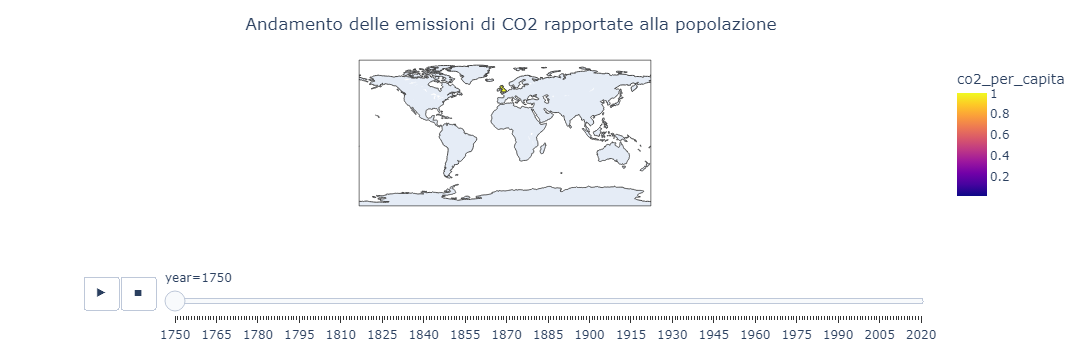

In [8]:
co2_ani = df.sort_values(by="year")
fig = px.choropleth(co2_ani, locations="country", locationmode="country names", color="co2_per_capita", animation_frame="year")
fig.update_layout(
    title={
        'text': "Andamento delle emissioni di CO2 rapportate alla popolazione",
        'x': 0.47,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        lonaxis=dict(range=[-180, 180]),  # Range di longitudine
        lataxis=dict(range=[-90, 90])  # Range di latitudine
    )
)
fig.show()

## CONFRONTO DELLE EMISSIONI TRA IL 1750 E IL 2020 RAPPORTATE ALLA POPOLAZIONE

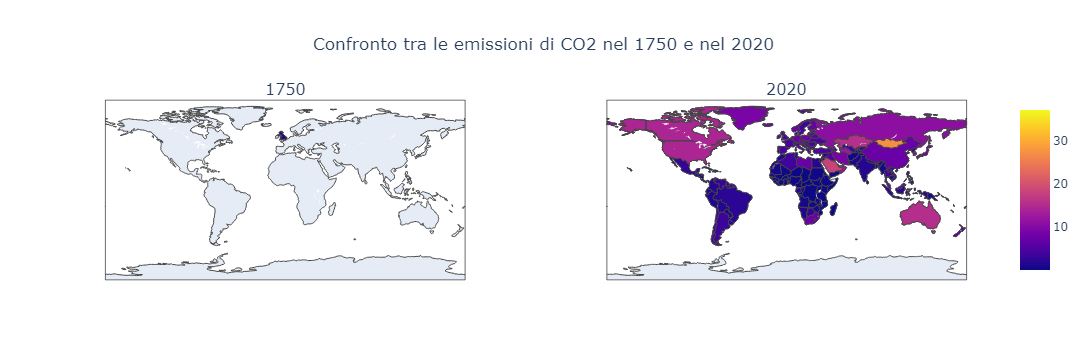

In [9]:
co2_1750 = df[df.year==1750]
fig1 = px.choropleth(co2_1750, locations="country", locationmode="country names", color="co2_per_capita")
fig1.update_layout(
    title={
        'text': "Le emissioni di CO2 nel 1750 rapportate alla popolazione",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        lonaxis=dict(range=[-180, 180]),  # Range di longitudine
        lataxis=dict(range=[-90, 90])  # Range di latitudine
    )
)

co2_2020 = df[df.year==2020]
fig2 = px.choropleth(co2_2020, locations="country", locationmode="country names", color="co2_per_capita")
fig2.update_layout(
    title={
        'text': "Le emissioni di CO2 nel 2020 rapportate alla popolazione",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        lonaxis=dict(range=[-180, 180]),  # Range di longitudine
        lataxis=dict(range=[-90, 90])  # Range di latitudine
    )
)

# Creazione della griglia di subplot e inserimento delle mappe
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("1750", "2020"), specs=[[{'type': 'geo'}, {'type': 'geo'}]])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

# Aggiornamento del layout generale
fig.update_layout(
    title="Confronto tra le emissioni di CO2 nel 1750 e nel 2020",
    title_x=0.5
)

fig.show()

## ANDAMENTO DELLA DISTRIBUZIONE DI CO2 IN ITALIA NEGLI ULTIMI 30 ANNI

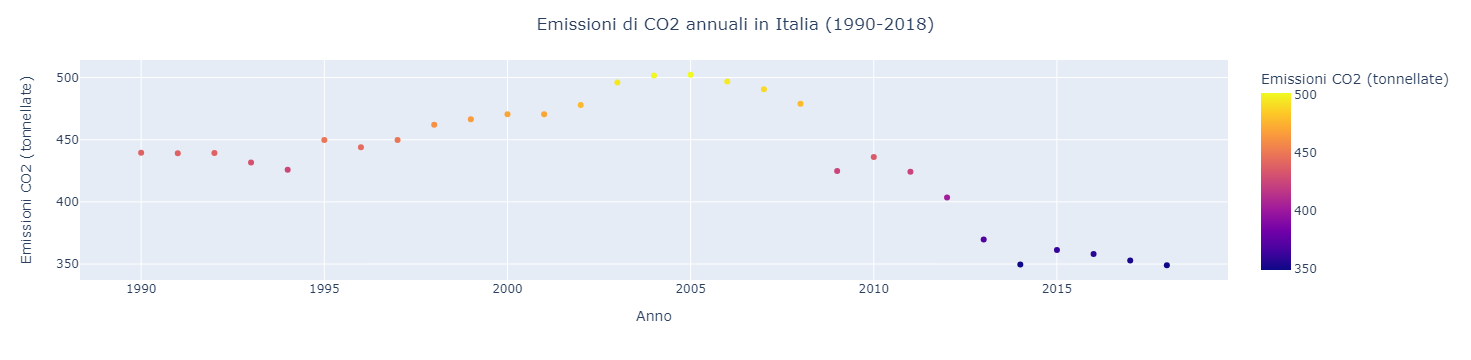

In [49]:
co2_ita = df.dropna()
co2_ita = co2_ita[co2_ita.country=="Italy"]

# Aggiungi un filtro per selezionare solo gli anni dal 1990 al 2020
co2_ita = co2_ita[(co2_ita['year'] >= 1990) & (co2_ita['year'] <= 2020)]

# Crea un grafico scatter per visualizzare le emissioni di CO2 in Italia in questo intervallo di anni
fig = px.scatter(co2_ita, x="year", y="co2", color="co2", labels={'co2': 'Emissioni CO2 (tonnellate)'})

# Aggiorna il layout del grafico per includere titoli e adeguamenti
fig.update_layout(
    title={
        'text': "Emissioni di CO2 annuali in Italia (1990-2018)",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Anno",
    yaxis_title="Emissioni CO2 (tonnellate)",
)

fig.show()

## ANALISI TEMPORALE GLOBALE DELLE EMISSIONI DI CO2

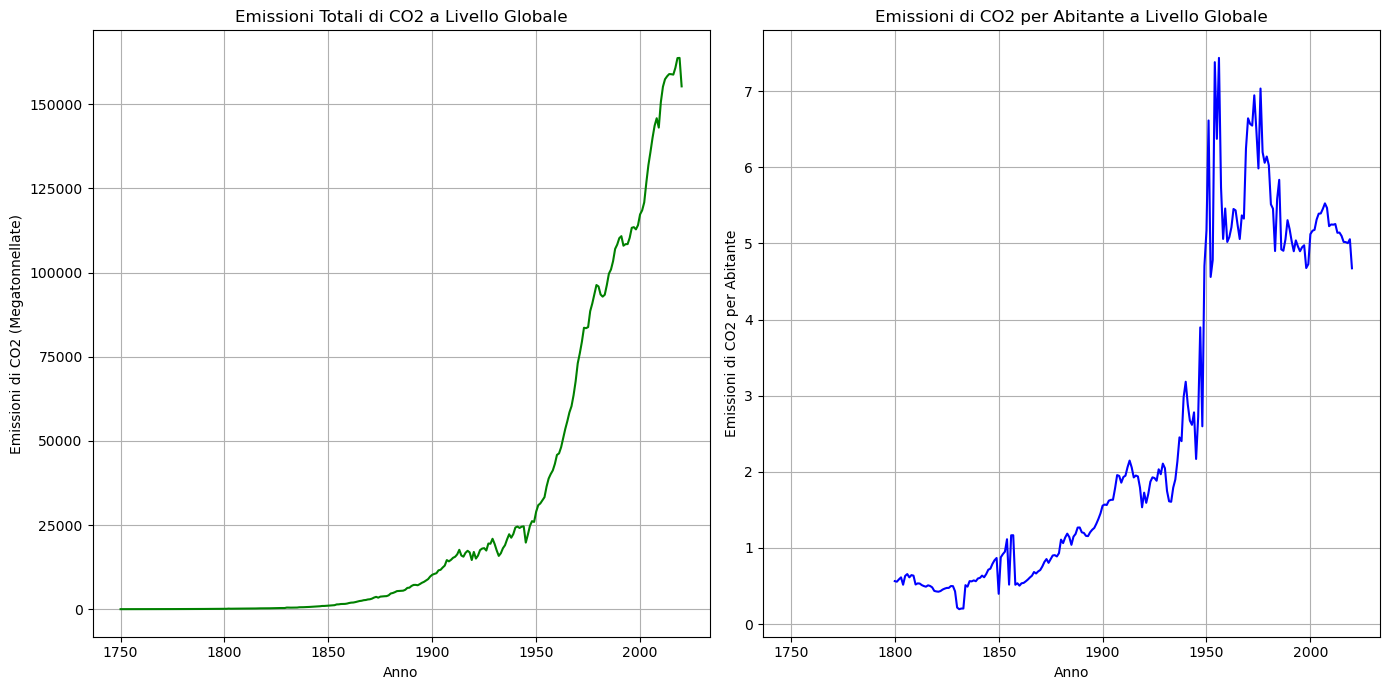

In [57]:
global_co2_emissions = df.groupby('year')['co2'].sum().reset_index()

# Calcolo delle emissioni di CO2 per capita per anno
global_co2_per_capita = df.groupby('year')['co2_per_capita'].mean().reset_index()

# Visualizzazione delle emissioni totali di CO2 e delle emissioni di CO2 per capita
plt.figure(figsize=(14, 7))

# Emissioni totali di CO2
plt.subplot(1, 2, 1)
plt.plot(global_co2_emissions['year'], global_co2_emissions['co2'], color='green')
plt.title('Emissioni Totali di CO2 a Livello Globale')
plt.xlabel('Anno')
plt.ylabel('Emissioni di CO2 (Megatonnellate)')
plt.grid(True)

# Emissioni di CO2 per capita
plt.subplot(1, 2, 2)
plt.plot(global_co2_per_capita['year'], global_co2_per_capita['co2_per_capita'], color='blue')
plt.title('Emissioni di CO2 per Abitante a Livello Globale')
plt.xlabel('Anno')
plt.ylabel('Emissioni di CO2 per Abitante')
plt.grid(True)

plt.tight_layout()
plt.show()

<b>Tendenze Globali delle Emissioni di CO2</b> <br>
L'analisi temporale delle emissioni totali di CO2 e delle emissioni di CO2 per capita mostra una crescente traiettoria delle emissioni globali, sottolineando l'urgente necessità  di azioni di mitigazione. Il grafico delle emissioni totali di CO2 rivela un aumento sostenuto nel corso degli anni, indicando l'escalation dell'impatto umano sul clima. Parimenti, il grafico delle emissioni di CO2 per abitante fornisce una prospettiva su come, in media, l'impronta di carbonio individuale sia variata nel tempo, con fluttuazioni che possono riflettere cambiamenti nella distribuzione globale della produzione energetica e nell'efficienza.

## CORRELAZIONE TRA PIL E EMISSIONI DI CO2

In [12]:
# Pulizia dei dati: rimuoviamo le righe dove i valori di PIL o CO2 sono mancanti
df_clean = df.dropna(subset=['gdp', 'co2'])

# Calcoliamo il coefficiente di correlazione di Pearson tra PIL e emissioni di CO2
correlation_matrix = df_clean[['gdp', 'co2']].corr(method='pearson')

# Stampa del coefficiente di correlazione
print("Correlazione tra PIL e emissioni di CO2:")
correlation_matrix

Correlazione tra PIL e emissioni di CO2:


gdp       co2
gdp  1.000000  0.954718
co2  0.954718  1.000000

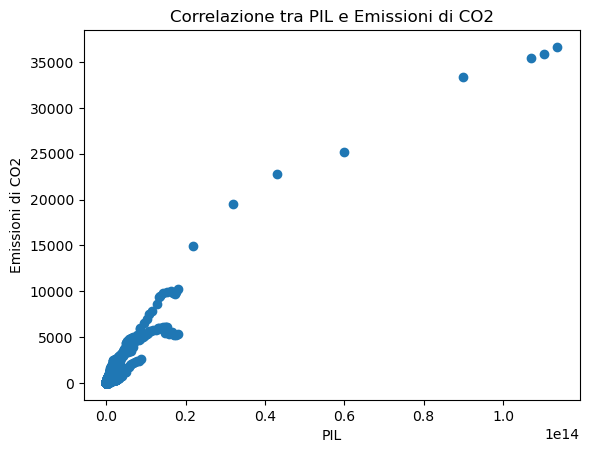

In [13]:
plt.scatter(df_clean['gdp'], df_clean['co2'])
plt.title('Correlazione tra PIL e Emissioni di CO2')
plt.xlabel('PIL')
plt.ylabel('Emissioni di CO2')
plt.show()

<b>Correlazione tra PIL e Emissioni di CO2</b> <br>
La forte correlazione positiva tra il PIL e le emissioni di CO2 evidenzia come la crescita economica sia stata storicamente accompagnata da un incremento delle emissioni di gas serra. Questo porta a dover riflettere sulla dipendenza delle economie dai combustibili fossili per l'energia necessaria a sostenere l'attività  industriale, il trasporto, il riscaldamento e la produzione di elettricità . Da qui nasce la necessità  di mitigare la crescita economica dalle emissioni di CO2 attraverso l'innovazione tecnologica e le politiche di sviluppo sostenibile.

## ANALISI SETTORIALE DELLE EMISSIONI DI CO2 

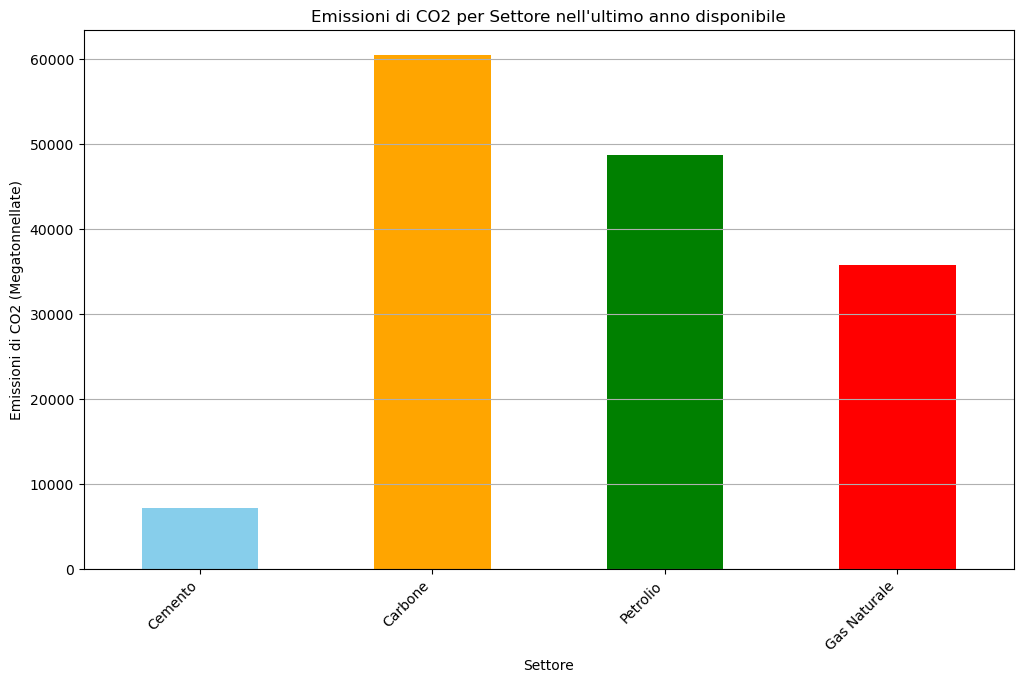

In [48]:
latest_year = df['year'].max()
sector_emissions = df[df['year'] == latest_year][['cement_co2', 'coal_co2', 'oil_co2', 'gas_co2']].sum()

plt.figure(figsize=(12, 7))
sector_emissions.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title('Emissioni di CO2 per Settore nell\'ultimo anno disponibile')
plt.xlabel('Settore')
plt.ylabel('Emissioni di CO2 (Megatonnellate)')
plt.grid(axis='y')

# Aggiornamento delle etichette sull'asse x
plt.gca().set_xticklabels(['Cemento', 'Carbone', 'Petrolio', 'Gas Naturale'], rotation=45, ha='right')

plt.show()



<b>Analisi delle Emissioni per Settore</b><br>
L'analisi settoriale rivela una complessa distribuzione delle fonti di emissioni di CO2. Mentre il carbone rimane il principale contributore alle emissioni, seguito da petrolio e gas naturale, il cemento rappresenta una quota minore ma significativa. Questo panorama sottolinea ulteriormente l'importanza di strategie di mitigazione mirate verso la transizione energetica. La riduzione della dipendenza da combustibili fossili ad alta intensità di carbonio, come carbone e petrolio, e l'aumento dell'impiego di fonti energetiche rinnovabili emerge come un percorso critico. Inoltre, l'analisi evidenzia il ruolo non trascurabile del gas naturale nelle emissioni globali di CO2, suggerendo che anche la gestione e la riduzione delle emissioni da questa fonte debbano essere considerate nelle strategie di mitigazione del cambiamento climatico. Affrontare le emissioni dal settore del cemento, attraverso innovazioni tecnologiche e l'adozione di pratiche sostenibili, è un altro aspetto chiave per ridurre l'impronta di carbonio globale.

## Confronto Internazionale delle Emissioni di CO2

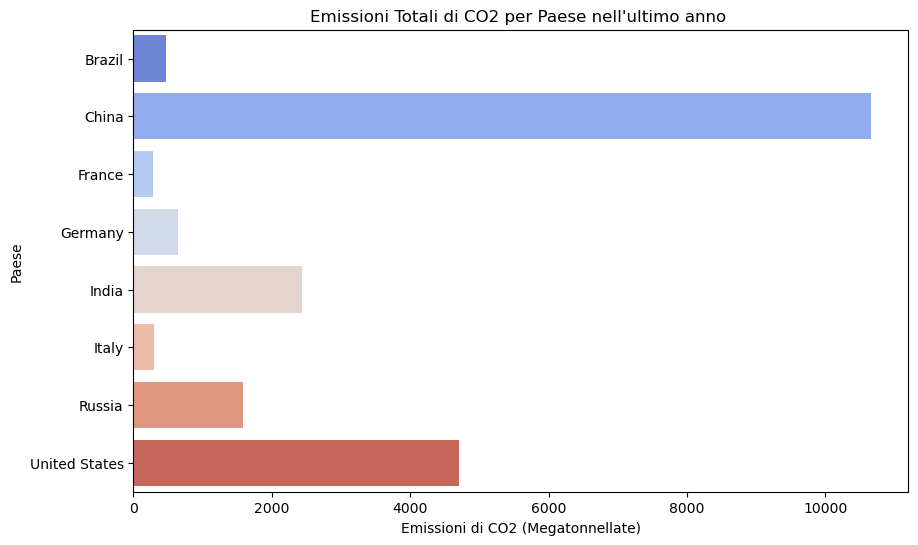

In [15]:
# Definisci l'elenco dei paesi per il confronto
selected_countries = ['United States', 'China', 'India', 'Brazil', 'Germany', 'France', 'Italy', 'Russia']

# Identifica l'ultimo anno disponibile nel dataset
latest_year = df['year'].max()

# Filtra il dataset per l'ultimo anno e per i paesi selezionati
comparison_data = df[(df['country'].isin(selected_countries)) & (df['year'] == latest_year)].copy()

# Calcola il PIL per capita in modo sicuro per evitare il SettingWithCopyWarning
comparison_data.loc[:, 'gdp_per_capita'] = comparison_data['gdp'] / comparison_data['population']

# Seleziona solo le colonne di interesse per il confronto
comparison_metrics = comparison_data[['country', 'co2', 'co2_per_capita']]

plt.figure(figsize=(10, 6))
sns.barplot(x='co2', y='country', data=comparison_data, palette='coolwarm')
plt.title('Emissioni Totali di CO2 per Paese nell\'ultimo anno ')
plt.xlabel('Emissioni di CO2 (Megatonnellate)')
plt.ylabel('Paese')
plt.show()

In [16]:
# Visualizza i risultati
comparison_metrics

country        co2  co2_per_capita
3486          Brazil    467.384           2.199
4723           China  10667.887           7.412
8786          France    276.634           4.238
9619         Germany    644.310           7.690
11277          India   2441.792           1.769
12112          Italy    303.815           5.025
19597         Russia   1577.136          10.807
24661  United States   4712.771          14.238

<b>Confronto Internazionale delle Emissioni di CO2</b><br>
Il confronto tra paesi evidenzia differenze significative nelle emissioni totali di CO2 e nelle emissioni per capita, riflettendo disparità  nel livello di sviluppo, nelle pratiche di consumo energetico e nelle politiche ambientali. Gli Stati Uniti mostrano le più alte emissioni di CO2 per capita tra i paesi analizzati, mentre la Cina è il più grande emettitore totale di CO2. Queste differenze sottolineano l'importanza di un approccio personalizzato nelle politiche di mitigazione, considerando le specificità  nazionali.

## Correlazione tra Popolazione e Emissioni di CO2



In [17]:
# Calcolo della correlazione tra popolazione e emissioni totali di CO2
correlation_pop_co2 = df[['population', 'co2']].corr(method='pearson')
print("Correlazione tra Popolazione e Emissioni Totali di CO2:")
correlation_pop_co2

Correlazione tra Popolazione e Emissioni Totali di CO2:


population       co2
population    1.000000  0.881641
co2           0.881641  1.000000

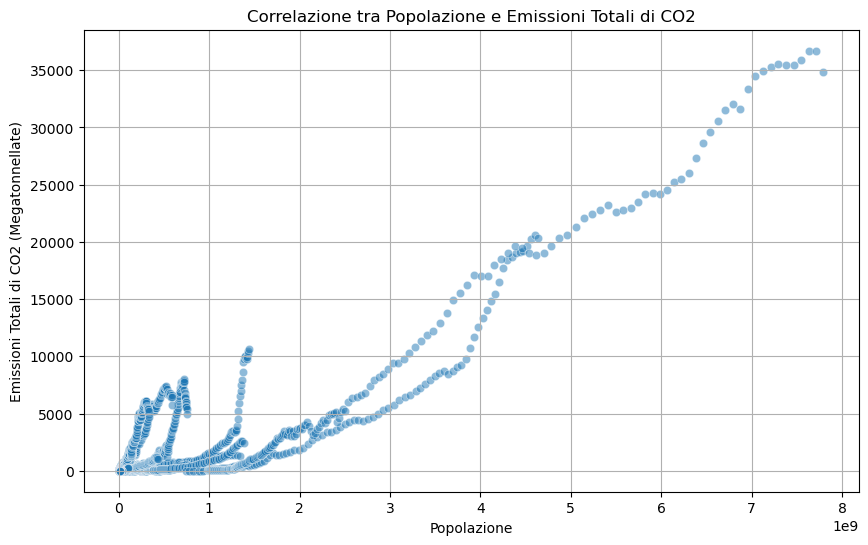

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='co2', data=df, alpha=0.5)
plt.title('Correlazione tra Popolazione e Emissioni Totali di CO2')
plt.xlabel('Popolazione')
plt.ylabel('Emissioni Totali di CO2 (Megatonnellate)')
plt.grid(True)
plt.show()


In [19]:
# Calcolo della correlazione tra popolazione e emissioni di CO2 per abitante
correlation_pop_co2_per_capita = df[['population', 'co2_per_capita']].corr(method='pearson')
print("\nCorrelazione tra Popolazione e Emissioni di CO2 per Abitante:")
correlation_pop_co2_per_capita



Correlazione tra Popolazione e Emissioni di CO2 per Abitante:


population  co2_per_capita
population        1.000000       -0.012802
co2_per_capita   -0.012802        1.000000

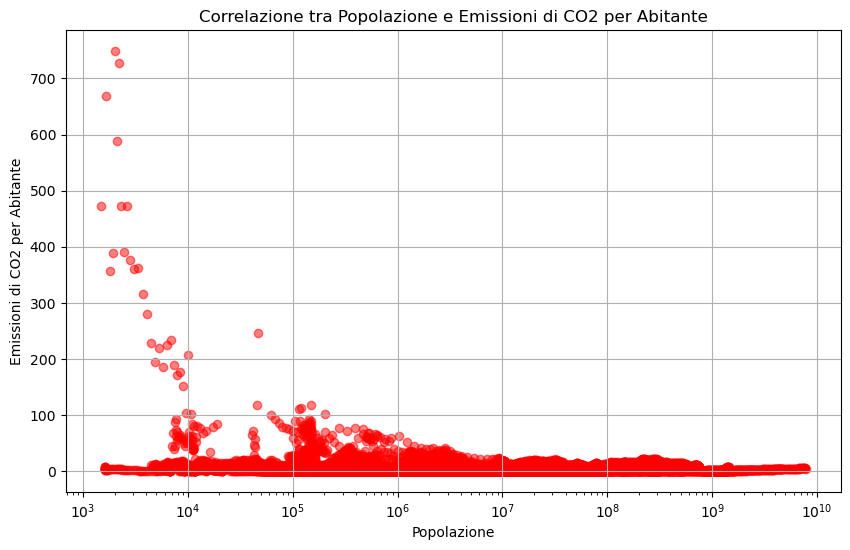

In [20]:
# Grafico di dispersione per la correlazione tra popolazione e emissioni di CO2 per abitante
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['co2_per_capita'], alpha=0.5, color='red')
plt.title('Correlazione tra Popolazione e Emissioni di CO2 per Abitante')
plt.xlabel('Popolazione')
plt.ylabel('Emissioni di CO2 per Abitante')
plt.xscale('log')  # Opzionale: Scala logaritmica per una migliore visualizzazione
plt.grid(True)
plt.show()

<b>Correlazione tra Popolazione e Emissioni di CO2</b><br>
L'analisi rivela una forte correlazione diretta tra la grandezza della popolazione di un paese e le sue emissioni totali di CO2, indicando che nazioni con popolazioni maggiori tendono generalmente a produrre più emissioni di gas serra. Questo è intuitivo, dato che una popolazione più ampia richiede più energia per sostenere le sue attività  quotidiane e lo sviluppo economico. D'altro canto, l'analisi non mostra una relazione significativa tra la popolazione e le emissioni di CO2 per abitante. Ciò suggerisce che le emissioni pro capite non sono direttamente influenzate dalla dimensione della popolazione, ma piuttosto da altri fattori come le politiche energetiche, l'efficienza nell'uso dell'energia, e il mix energetico adottato. In breve, mentre più persone in un paese implicano più emissioni totali, quanto carbonio una persona emette dipende da come quel paese produce e consuma energia, non semplicemente da quante persone vi abitano.

## EMISSIONI PER CONTINENTE NELL' ANNO 2020

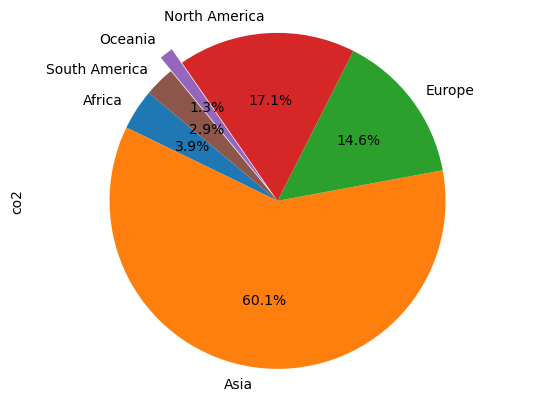

In [21]:
# Lista dei continenti
continenti = ['Europe', 'Asia', 'Oceania', 'Africa', 'North America', 'South America']

# Filtrare il DataFrame per includere solo i dati dei continenti
df_continenti = df[df['country'].isin(continenti)]

# Calcolare le emissioni totali di CO2 per continente per l'ultimo anno disponibile
ultimo_anno = df_continenti['year'].max()
emissioni_totali_per_continente = df_continenti[df_continenti['year'] == ultimo_anno].groupby('country')['co2'].sum()

# Preparare il parametro 'explode'
explode = [0 if continente != 'Oceania' else 0.1 for continente in emissioni_totali_per_continente.index]

# Creare un grafico ad anello con l'Oceania esplodente
emissioni_totali_per_continente.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<b> Emissioni  di CO2 per Continente nell' anno 2020</b><br>
Il grafico a torta mostra la distribuzione percentuale delle emissioni totali di CO2 tra i diversi continenti nell'ultimo anno disponibile. Ogni fetta del grafico rappresenta la proporzione delle emissioni totali di CO2 per un continente specifico rispetto al totale globale delle emissioni di CO2. La fetta più grande corrisponde all'Asia, con il 60,1% delle emissioni totali di CO2, seguita da altre fette che rappresentano le percentuali di contributo delle altre regioni. Le americhe nel complessivo raggiungono un 20%, seguito dal 14,6% dell' Europa e il restante 5% degli altri 2 continenti.

## EMISSIONI TOTALI PER CONTINENTE

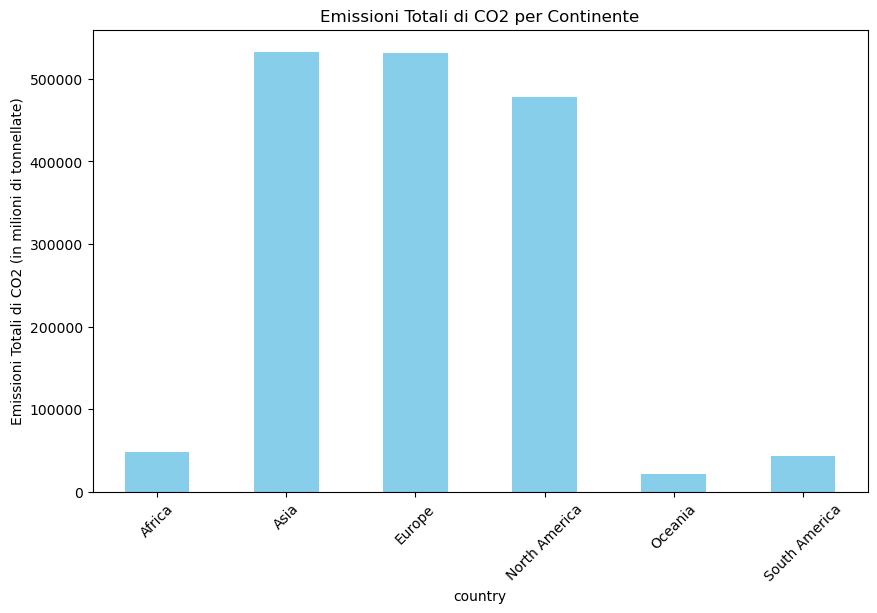

In [22]:
# Lista dei continenti
continenti = ['Europe', 'Asia', 'Oceania', 'Africa', 'North America', 'South America']

# Filtrare il DataFrame per includere solo i dati dei continenti
df_continenti = df[df['country'].isin(continenti)]

# Calcolare le emissioni totali di CO2 per continente per tutti gli anni disponibili
emissioni_totali_per_continente_tutti_anni = df_continenti.groupby('country')['co2'].sum()

# Creare un grafico a barre per visualizzare le emissioni totali di CO2 per continente
plt.figure(figsize=(10, 6))  # Imposta le dimensioni del grafico
emissioni_totali_per_continente_tutti_anni.plot(kind='bar', color='skyblue')
plt.ylabel('Emissioni Totali di CO2 (in milioni di tonnellate)')
plt.title('Emissioni Totali di CO2 per Continente')
plt.xticks(rotation=45)  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.show()

<b>Confronto delle emissioni di CO2 per continente nel complessivo </b><br>
Asia ed Europa: Tipicamente mostra le emissioni totali di CO2 più elevate, riflettendo l'ampia popolazione e l'intensa attività industriale di questi contineti.
America: Questo continente potrebbe avere emissioni generali significativamente più alte, sebbene generalmente inferiori all'Asia, a causa sia delle economie sviluppate che delle politiche ambientali in atto.
Africa e Oceania: Solitamente mostrano emissioni più basse, riflettendo una combinazione di minor industrializzazione (Africa) e popolazione relativamente bassa (Oceania).

## DISTRIBUZIONE DELLE EMISSIONI DI CO2 PER TIPOLOGIA IN OGNI CONTINENTE

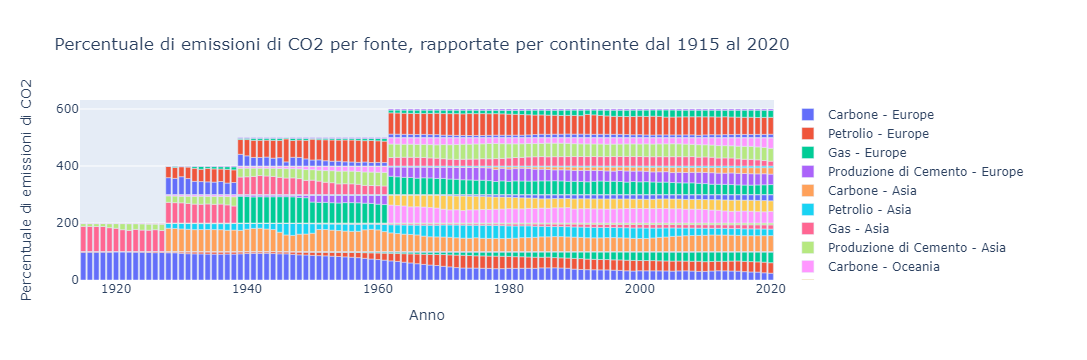

In [44]:
import plotly.graph_objects as go

# Lista dei continenti presenti nel dataset
continenti = ['Europe', 'Asia', 'Oceania', 'Africa', 'North America', 'South America']

# Filtrare il DataFrame per includere solo i dati dei continenti e gli anni a partire dal 1915
df_continenti = df[(df['country'].isin(continenti)) & (df['year'] >= 1915)].copy()

# Calcolo delle percentuali di emissioni di CO2 per ciascuna fonte, rapportate per continente e anno
df_continenti['total_co2'] = df_continenti['coal_co2'] + df_continenti['oil_co2'] + df_continenti['gas_co2'] + df_continenti['cement_co2']
df_continenti['coal_percentage'] = df_continenti['coal_co2'] / df_continenti['total_co2'] * 100
df_continenti['oil_percentage'] = df_continenti['oil_co2'] / df_continenti['total_co2'] * 100
df_continenti['gas_percentage'] = df_continenti['gas_co2'] / df_continenti['total_co2'] * 100
df_continenti['cement_percentage'] = df_continenti['cement_co2'] / df_continenti['total_co2'] * 100

# Creazione del grafico a barre impilato per ogni continente
fig = go.Figure()

for continente in continenti:
    df_continente = df_continenti[df_continenti['country'] == continente]
    fig.add_trace(go.Bar(
        x=df_continente['year'],
        y=df_continente['coal_percentage'],
        name='Carbone - {}'.format(continente),
        offsetgroup='coal'  # Imposta un offsetgroup unico per il carbone
    ))
    fig.add_trace(go.Bar(
        x=df_continente['year'],
        y=df_continente['oil_percentage'],
        name='Petrolio - {}'.format(continente),
        offsetgroup='oil'  # Imposta un offsetgroup unico per il petrolio
    ))
    fig.add_trace(go.Bar(
        x=df_continente['year'],
        y=df_continente['gas_percentage'],
        name='Gas - {}'.format(continente),
        offsetgroup='gas'  # Imposta un offsetgroup unico per il gas
    ))
    fig.add_trace(go.Bar(
        x=df_continente['year'],
        y=df_continente['cement_percentage'],
        name='Produzione di Cemento - {}'.format(continente),
        offsetgroup='cement'  # Imposta un offsetgroup unico per il cemento
    ))

# Aggiornamento del layout del grafico
fig.update_layout(
    title="Percentuale di emissioni di CO2 per fonte, rapportate per continente dal 1915 al 2020",
    xaxis_title="Anno",
    yaxis_title="Percentuale di emissioni di CO2",
    barmode='relative'
)

fig.show()


<b>Percentuale di emissioni di CO2 per fonte, rapportate per continente dal 1915 al 2020</b><br>
In questo grafico, tramite il cursore, si può verificare l' andamento dell' estrazione di risorse negli anni da parte dei vari continenti,  si può notare che nel tempo si è passati dall' estrarre principalemnte il carbone a un estrazione sempre maggiore di petrolio e gas minerali, mentre l' utilizzo del cemento che anche esso cresce nel tempo, con il suo utilizzo primario nell'edilizia.

## GEOPANDAS 

C:\Users\paolo\AppData\Local\Temp\ipykernel_152908\2075301319.py:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



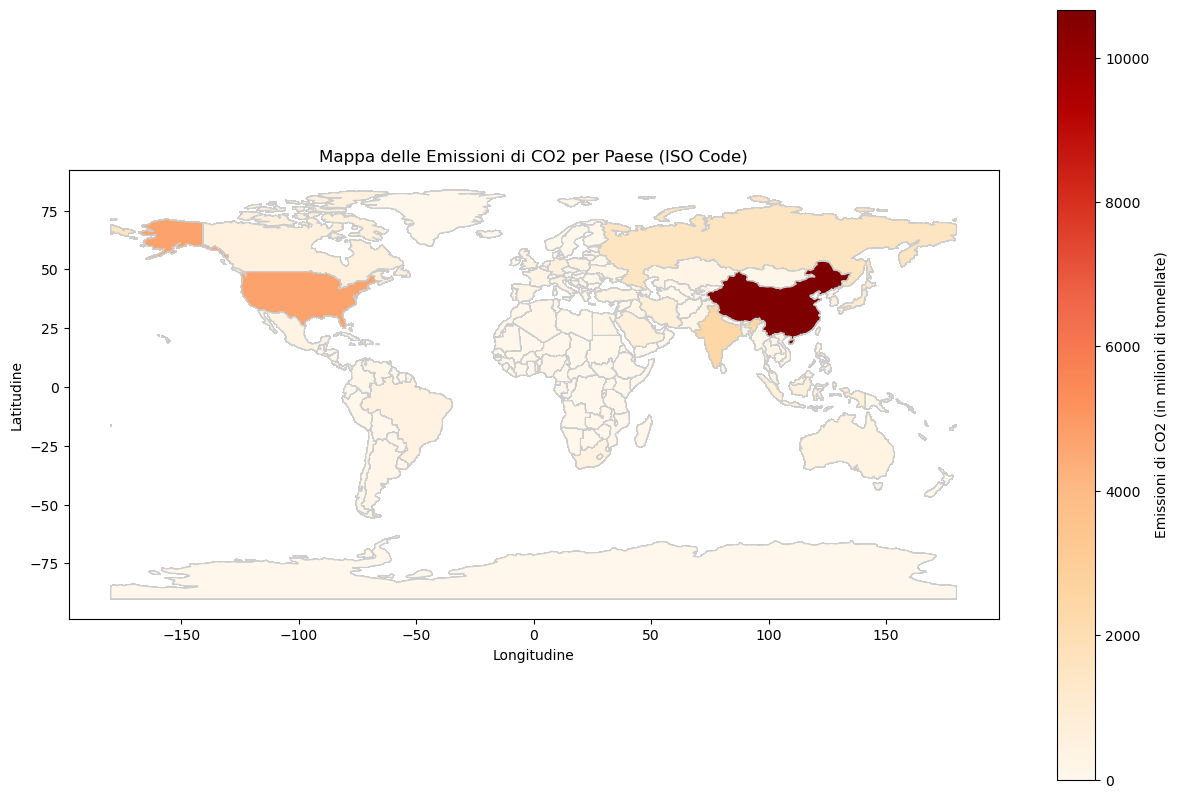

In [35]:
import geopandas as gpd
# Caricamento del file shapefile dei confini dei paesi con GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assicurati che entrambi i dataset abbiano una colonna 'iso_a3' in GeoPandas e 'iso_code' nel tuo dataset CO2
# Unione dei dati delle emissioni di CO2 con i dati geografici dei confini dei paesi usando i codici ISO
merged_data = world.merge(df, how='left', left_on='iso_a3', right_on='iso_code')

# Creazione di una mappa che mostra le emissioni di CO2 per paese
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Mappa delle Emissioni di CO2 per Paese (ISO Code)')
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Visualizzazione della mappa con una scala di colori che rappresenta le emissioni di CO2
merged_data.plot(column='co2', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Emissioni di CO2 (in milioni di tonnellate)"})
plt.show()


<B>HEAT MAP</B><br>
Il codice utilizza GeoPandas per creare una mappa tematica che rappresenta le emissioni di CO2 per continente. Questo tipo di visualizzazione è simile a una heatmap in quanto utilizza i colori per mostrare le differenze nei valori di una variabile (in questo caso, le emissioni di CO2) su una mappa geografica. La gradazione dei colori indica la distribuzione delle emissioni di CO2, consentendo una rapida comprensione dei pattern geografici delle emissioni a livello continentale. Le nazioni con maggiore produzione di CO2 

<h1 style="text-align: center; font-size: 36px;">CONCLUSIONI</h1>

<b>Relazione tra PIL e Emissioni di CO2:</b> L'analisi ha mostrato una forte correlazione positiva (0.95) tra il PIL e le emissioni di CO2, suggerendo che, in generale, i paesi con un'economia più grande tendono a emettere più CO2. Questo implica che lo sviluppo economico e l'industrializzazione vanno di pari passo con un aumento delle emissioni di gas serra, sottolineando la necessità di politiche economiche sostenibili.

<b>Analisi per Paese:</b> Specifici paesi, come Cina, Stati Uniti, Russia, e India, sono stati identificati come i maggiori emettitori di CO2. Questi paesi, oltre ad avere grandi economie, hanno anche significative emissioni di CO2 per capita, con gli Stati Uniti che mostrano le emissioni per capita più elevate. Questo indica la necessità di interventi mirati in questi paesi per ridurre le emissioni globali.

<b>Distribuzione Continentale delle Emissioni:</b> Le emissioni di CO2 sono state analizzate anche a livello continentale, evidenziando come l'Asia sia il continente con le maggiori emissioni totali di CO2, seguita dalle Americhe ed Europa. L'Africa e l'Oceania contribuiscono in misura minore alle emissioni globali, il che riflette differenze in termini di sviluppo industriale e demografico.

<b>Relazione tra Popolazione e Emissioni di CO2:</b> È stata osservata una correlazione significativa (0.88) tra la popolazione dei paesi e le loro emissioni totali di CO2, suggerendo che paesi con popolazioni più grandi tendono ad avere emissioni più elevate. Tuttavia, l'analisi delle emissioni di CO2 per capita in relazione alla popolazione mostra una correlazione molto bassa, indicando che la densità di popolazione non è un fattore determinante diretto delle emissioni per capita.

<h1 style="text-align: center; font-size: 36px;">POSSIBILI SOLUZIONI</h1>

<b>Promuovere lo Sviluppo Sostenibile:</b> È cruciale incoraggiare pratiche di sviluppo economico che minimizzino l'impatto ambientale, soprattutto nei paesi con economie in rapida crescita. Questo può includere investimenti in tecnologie verdi e rinnovabili, politiche di efficienza energetica e la promozione di settori a basso consumo di carbonio.

<b>Interventi Mirati nei Maggiori Paesi Emettitori:</b> Data l'importanza dei maggiori emettitori globali, è essenziale che questi paesi adottino misure aggressive per ridurre le loro emissioni. Ciò può includere l'imposizione di tasse sul carbonio, lo sviluppo di infrastrutture verdi e l'adozione di standard di emissione più rigorosi per l'industria.

<b>Cooperazione Internazionale:</b> Il problema del cambiamento climatico è globale e richiede una risposta coordinata. Gli accordi internazionali e la collaborazione tra paesi possono facilitare la condivisione di tecnologie pulite, finanziamenti per l'adattamento al clima nei paesi in via di sviluppo e strategie comuni per la riduzione delle emissioni.

<b>Focus sulle Energie Rinnovabili:</b> È fondamentale accelerare il passaggio a fonti di energia rinnovabile come solare, eolico e idroelettrico. Gli incentivi per l'adozione di energie pulite possono aiutare a ridurre la dipendenza dai combustibili fossili e diminuire le emissioni di CO2.

<b>Valutare l'Energia Nucleare come Alternativa Pulita:</b> Data la necessità di ridurre drasticamente le emissioni di CO2 senza compromettere la crescita economica e la sicurezza energetica, l'energia nucleare emerge come una potenziale soluzione. Pur essendo oggetto di dibattiti per questioni di sicurezza e gestione dei rifiuti, l'energia nucleare produce una quantità minima di emissioni di CO2 durante il suo ciclo di vita operativo. L'adozione di tecnologie nucleari avanzate e più sicure può rappresentare un percorso vitale per raggiungere gli obiettivi di decarbonizzazione, in parallelo con l'espansione delle rinnovabili. La chiave sarà un approccio bilanciato che tenga conto dello sviluppo economico e della necessità di proteggere l'ambiente per le generazioni future, considerando tutte le opzioni energetiche disponibili per una transizione pulita.